# Project: Analysis of a European Soccer Dataset
Irish Mehta, April 2020

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> This soccer(football) database comes from [Kaggle](https://www.kaggle.com/hugomathien/soccer) and is well suited for data analysis and machine learning. It contains data for soccer matches, players, and teams from several European countries from 2008 to 2016. This dataset is quite extensive and varies from different leagues to the betting factors to the player statistics across the continent
>
> A few questions posed below, have been answered using pure data analysis. It's beautiful to visualise the data and interpret it in a way that can be used for future analysis

#### Question 1: Which players have improved throughout the years?

#### Question 2: What player attributes affect the overall rating?

#### Question 3: Which team out of all leagues has the highest goal difference across all leagues in different seasons?

#### Question 4: Were these teams the respective leaders of their leagues in that season?
___

In [1]:
# importing all the packages required
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Exploring the data followed by posing possible limitations

_While reading this analysis, please note that an explanation will be given either in the comments or below the cell_

### General Properties

In [2]:
# accessing the database using the sqlite3 library and loading all the tables as a dataframe in pandas
table= sqlite3.connect(r"C:\Users\Irish Mehta\Downloads\database.sqlite")
df_country = pd.read_sql('SELECT * FROM Country', table)
df_league = pd.read_sql('SELECT * FROM League', table)
df_team = pd.read_sql('SELECT * FROM Team', table)
df_ta = pd.read_sql('SELECT * FROM Team_Attributes', table)
df_player = pd.read_sql('SELECT * FROM Player', table)
df_pa = pd.read_sql('SELECT * FROM Player_Attributes', table)
df_match = pd.read_sql('SELECT * FROM Match', table)



In [3]:
# Checking contents and shape of the countries table

print(df_country,"\n \n Shape=", df_country.shape)

       id         name
0       1      Belgium
1    1729      England
2    4769       France
3    7809      Germany
4   10257        Italy
5   13274  Netherlands
6   15722       Poland
7   17642     Portugal
8   19694     Scotland
9   21518        Spain
10  24558  Switzerland 
 
 Shape= (11, 2)


In [4]:
# Checking contents and shape of the league table

print(df_league,"\n \n Shape=", df_league.shape)

       id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League 
 
 Shape= (11, 3)


The _country_id_ column will help in corresponding league names with the team names

___

In [5]:
df_team.head(2)

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC


The team names can be associated with their respective leagues based on _team_api_id_. More while cleaning.

In [6]:
print(df_team.team_long_name.count(),",",len(df_team.team_long_name.unique()))

299 , 296


Since the number of rows are not same when considering unique team names, there is a problem of repeated naming.

In [7]:
df_ta.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


The team_api_id will be useful to concatenate this with team names

___

In [8]:
# Checking contents of the player table

print(df_league,"\n \n Shape=", df_league.shape)
df_player.head(2)

       id  country_id                      name
0       1           1    Belgium Jupiler League
1    1729        1729    England Premier League
2    4769        4769            France Ligue 1
3    7809        7809     Germany 1. Bundesliga
4   10257       10257             Italy Serie A
5   13274       13274    Netherlands Eredivisie
6   15722       15722        Poland Ekstraklasa
7   17642       17642  Portugal Liga ZON Sagres
8   19694       19694   Scotland Premier League
9   21518       21518           Spain LIGA BBVA
10  24558       24558  Switzerland Super League 
 
 Shape= (11, 3)


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146


In [9]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
id                    11060 non-null int64
player_api_id         11060 non-null int64
player_name           11060 non-null object
player_fifa_api_id    11060 non-null int64
birthday              11060 non-null object
height                11060 non-null float64
weight                11060 non-null int64
dtypes: float64(1), int64(4), object(2)
memory usage: 604.9+ KB


Having a quick glance at the df_players dataframe, it's noticeable that column birthday is not of datetime datatype, which is important for extracting age. Modification done while cleaning.

In [10]:
print(len(df_player.player_name),",",len(df_player.player_name.unique()))

11060 , 10848


A comparison between total player names and unique player names. The reason is explained below

In [11]:
df_player[df_player.duplicated("player_name")].head(20)

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
85,86,41749,Adailton,4769,1977-01-24 00:00:00,175.26,161
99,100,420209,Adam Drury,205162,1993-09-09 00:00:00,177.80,152
138,139,533212,Adama Traore,225151,1995-06-28 00:00:00,177.80,159
191,192,30690,Adriano,106019,1982-02-17 00:00:00,187.96,194
192,193,33992,Adriano,164082,1984-10-26 00:00:00,172.72,161
193,194,41109,Adriano,152769,1980-01-29 00:00:00,182.88,176
405,406,80566,Alex Bruno,162003,1982-05-09 00:00:00,187.96,190
438,440,163838,Alex,198033,1991-08-27 00:00:00,175.26,148
439,442,26564,Alex,136130,1982-06-17 00:00:00,187.96,203
515,518,41718,Alhassane Keita,49940,1983-06-26 00:00:00,170.18,150


**These players are the ones that have a common name, mainly because of their country of origin, but they are not redundant as the point of differentiation is the api ID of each player**

In [12]:
# Checking contents of the player attributes table

df_pa.head(2)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0


___

In [13]:
# Checking contents of the matches table

df_match.head()

,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


The most important dataframe from the extracted database. It has the seasons and the league ID to correspond with previous datafranes. We'll move on to cleaning now
___________________

**Starting to clean the 3 main datasets _df_ta,df_pa,df_match_ of duplicate values, redundant columns and incorrect datatypes**

### Data Cleaning: df_match

First step will be converting all timeformats to datetime datatype

In [14]:
df_ta['date'] = pd.to_datetime(df_ta['date'])
df_player['birthday'] = pd.to_datetime(df_player['birthday'])
df_pa['date'] = pd.to_datetime(df_pa['date'])
df_match['date'] = pd.to_datetime(df_match['date'])

In [15]:
# drop all columns that have a missing value

df_match.dropna(axis='columns', inplace=True)

This step avoids unnecessary usage of the columns that were not required at all for this analysis _(dropping the columns which were related to betting)_

In [16]:
#adding a year column to the df_match just for convenience

df_match['year'] = df_match['date'].dt.year

In [17]:
# Merging the df_match dataframe with respective countries 

# rename name to country_name and id to country_id
df_country.rename(columns={'name' : 'country_name', 'id': 'country_id'}, inplace=True)

# apply inner merge with country table
df_match = df_match.merge(df_country, how='inner', left_on='country_id', right_on='country_id')

# drop the country_id column
df_match.drop(columns=['country_id'], inplace=True)

df_match.head(1)


,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,country_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium


In [18]:
# Merging the df_match dataframe with respective leagues 

# Copying the league data to not tamper with the original data
df_copy_league = df_league.copy()

# rename the two columns 'name' and 'id'
df_copy_league.rename(columns={'name': 'league_name', 'id': 'league_id'}, inplace=True)

# apply inner merge with league table
df_match = df_match.merge(df_copy_league, how='inner', left_on='league_id', right_on='league_id')

# drop now country_id and league_id
df_match.drop(columns=['league_id', 'country_id'], inplace=True)

df_match.head(1)

,id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,year,country_name,league_name
0,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium,Belgium Jupiler League


In [19]:
# Dropping columns that are not required for merging

df_copy_team = df_team.copy()

# we don't need 'team_fifa_api_id', 'team_short_name', and 'id' columns in the copy team table
df_copy_team.drop(columns=[ 'team_fifa_api_id', 'team_short_name', 'id'], axis=1, inplace=True)

df_copy_team.head(1)

,team_api_id,team_long_name
0,9987,KRC Genk


In [20]:
# Merging the df_match dataframe with respective teams 

# first merge for the home_team_id
df_match = df_match.merge(df_copy_team, how='inner', left_on='home_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'home_team_name'}, inplace=True)

df_match.drop(columns=['home_team_api_id', 'team_api_id'], axis=1, inplace=True)

# second merge the away_team_id
df_match = df_match.merge(df_copy_team, how='left', left_on='away_team_api_id', right_on='team_api_id')

df_match.rename(columns={'team_long_name': 'away_team_name'}, inplace=True)

df_match.drop(columns=['team_api_id', 'away_team_api_id'], axis=1, inplace=True)

# cleaned match table
df_match.head(1)

,id,season,stage,date,match_api_id,home_team_goal,away_team_goal,year,country_name,league_name,home_team_name,away_team_name
0,1,2008/2009,1,2008-08-17,492473,1,1,2008,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC


A simple explanation of the lengthy code blocks is that the blocks merge the **_df_match_** dataframe with **df_teams**, **df_leagues** and **df_countries** along the **team_api_id**, **_league_id_** and **_country id_** columns
___

In [21]:
def winner(row):
    home_score = row[0]
    away_score = row[1]
    home_team_name = row[2]
    away_team_name = row[3]
    
    if home_score > away_score:
        return home_team_name
    elif home_score < away_score:
        return away_team_name
    else:
        return 'Draw'

df_match['winner']  = df_match[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name']].apply(winner, axis=1)

def gd(row):
    home_score = row[0]
    away_score = row[1]

    if home_score >= away_score:
        return home_score-away_score
    else:
        return away_score-home_score

df_match['goal_difference_of_winning_team']= df_match[['home_team_goal', 'away_team_goal']].apply(gd, axis=1)

The winner function defined above performs a small set of calculations using the goals scored by the home team and the away team to return whether the match result was a win or a draw. It takes in the row and returns _"Draw"_ or the winning team name


The gd function works similar to the winner function, difference being that the gd function returns the difference between goals scored in the match. For example, if the score is 3-2, the gd function will return 1. The usage will be required later

___

In [22]:
# Dropping columns not required for analysis

df_match.drop(['stage', 'match_api_id'], axis=1, inplace=True)

In [23]:
df_match.head()

,id,season,date,home_team_goal,away_team_goal,year,country_name,league_name,home_team_name,away_team_name,winner,goal_difference_of_winning_team
0,1,2008/2009,2008-08-17,1,1,2008,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Draw,0
1,29,2008/2009,2008-11-15,1,1,2008,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Draw,0
2,47,2008/2009,2008-11-29,3,2,2008,Belgium,Belgium Jupiler League,KRC Genk,KSV Cercle Brugge,KRC Genk,1
3,65,2008/2009,2008-12-13,1,0,2008,Belgium,Belgium Jupiler League,KRC Genk,Sporting Charleroi,KRC Genk,1
4,94,2008/2009,2009-01-24,2,0,2009,Belgium,Belgium Jupiler League,KRC Genk,RAEC Mons,KRC Genk,2


___

### Data Cleaning: Team and team attributes

1. Addressing the duplicate team values in the dataframe df_team

In [24]:
df_team[df_team.duplicated("team_long_name")]

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
24,2510,274581,111560.0,Royal Excel Mouscron,MOP
183,31445,8020,111429.0,Polonia Bytom,GOR
199,32409,8024,301.0,Widzew Łódź,WID


The reason for this duplicacy in the data might be because of various factors. Some of them might be temporary name change that a team did at the time of registration. Another factor can be human error during entry of the names

In [25]:
#dropping the duplicates

df_team.drop_duplicates(subset ="team_long_name",keep='first', inplace = True) 

2. Attaching the team attributes dataframe to the team dataframe

In [26]:
# Using inner join to combine teams with their attributes
df_team_att_merged = df_ta.merge(df_team, left_on='team_api_id', right_on='team_api_id')

# drop 3 columns that are not needed
df_team_att_merged.drop(columns=['team_fifa_api_id_x', 'id_y', 'team_fifa_api_id_y'], inplace=True)

# rename 2 columns because after merging two tables, the same columns get appended with the default suffix, _x for the left table, _y for the right table
df_team_att_merged.rename(columns={'id_x': 'id', 'team_fifa_api_id_x': 'team_fifa_api_id'}, inplace=True)

df_team_att_merged.head()

,id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,...,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,team_long_name,team_short_name
0,1,9930,2010-02-22,60,Balanced,NaN,Little,50,Mixed,Organised,...,Organised,50,Medium,55,Press,45,Normal,Cover,FC Aarau,AAR
1,2,9930,2014-09-19,52,Balanced,48.0,Normal,56,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
2,3,9930,2015-09-10,47,Balanced,41.0,Normal,54,Mixed,Organised,...,Organised,47,Medium,44,Press,54,Normal,Cover,FC Aarau,AAR
3,4,8485,2010-02-22,70,Fast,NaN,Little,70,Long,Organised,...,Organised,60,Medium,70,Double,70,Wide,Cover,Aberdeen,ABE
4,5,8485,2011-02-22,47,Balanced,NaN,Little,52,Mixed,Organised,...,Organised,47,Medium,47,Press,52,Normal,Cover,Aberdeen,ABE


**The dataset df_team_att_merged will not be used for this analysis as the posed questions do not require the usage of this data**
___

### Data Cleaning: Player and player attributes

In [27]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


In [28]:
df_player[df_player.duplicated("player_api_id")]

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight


Here the player_api_id is selected instead of player_name as there are a few common names as observed in the general properties.
Since 0 duplicates exist, no rows are dropped

In [29]:
# merging the df_player dataframe with player attributes

df_pa = df_pa.merge(df_player, left_on='player_api_id', right_on='player_api_id')

df_pa.rename(columns={'id_x': 'id'}, inplace=True)

df_pa.drop(columns=['id_y', 'player_fifa_api_id_y', 'player_fifa_api_id_x'], inplace=True)

___

<a id='eda'></a>
## Exploratory Data Analysis

> The questions posed in the introduction are answered

### Trend Analysis: General trend of players across europe.

In [30]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154


In [31]:
# Extract birth year and birth month from birthday 

df_player['birthyear'] = df_player['birthday'].apply(lambda t: t.year)

df_player['birthmonth'] = df_player['birthday'].apply(lambda t: t.month)

df_player[['birthyear', 'height', 'weight','birthmonth']].describe()

,birthyear,height,weight,birthmonth
count,11060.000000,11060.000000,11060.000000,11060.000000
mean,1986.642857,181.867445,168.380289,5.942315
std,5.481362,6.369201,14.990217,3.431808
min,1967.000000,157.480000,117.000000,1.000000
25%,1983.000000,177.800000,159.000000,3.000000
50%,1987.000000,182.880000,168.000000,6.000000
75%,1991.000000,185.420000,179.000000,9.000000
max,1999.000000,208.280000,243.000000,12.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000029F944079B0>,
      dtype=object)

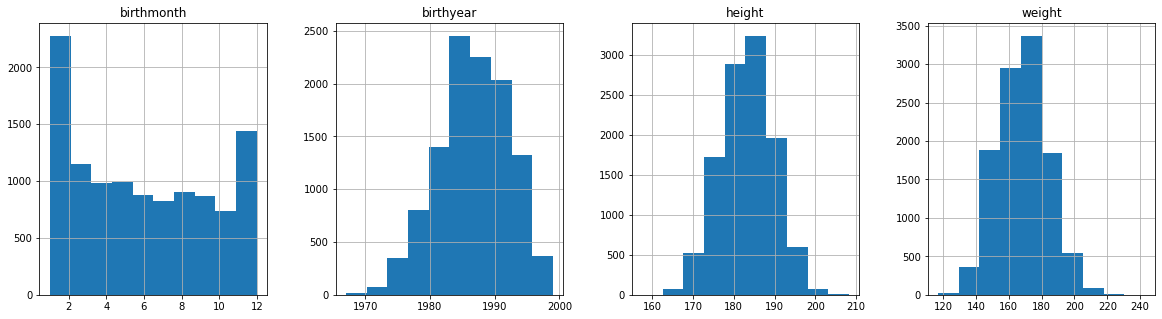

In [32]:
# Visualize the distribution of each variables using a histogram plot

df_player[['birthyear', 'height', 'weight','birthmonth']].hist(figsize = (20, 5), layout = (1, 4))

1. The birthmonth of all players follows almost an equal distribution except for the months of January and December and that is mainly because of a selection bias.
More written in this article https://www.offtheball.com/soccer/study-footballer-birth-dates-283111

2. The birthyear follows a slightly left skewed normal distribution implying there are more young players in the sport and is valid too as this sport requires a lot of stamina which is inversely proportionate to age

3. The weight and height follow normal distribution with the range being **_117-243 pounds_** and **_157-208 cm_** respectively

###  Question 1: Which players have improved throughout the years?

* To determine the improvement of players across seasons, there needs to be a season columns in the player attributes determined from the column of the match date. 
* The assumption here is that football seasons in Europe start in August and end in May of the next year
*****

In [33]:
def to_season (date):
    if date.month >= 7:
        return str(date.year)+"/"+str(date.year+1)
    else:
        return str(date.year-1)+"/"+str(date.year)
    

df_pa['season'] = df_pa['date'].apply(lambda t : to_season(t))

df_pa.head()

,id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,...,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,player_name,birthday,height,weight,season
0,1,505942,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,...,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187,2015/2016
1,2,505942,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,...,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187,2015/2016
2,3,505942,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,...,6.0,11.0,10.0,8.0,8.0,Aaron Appindangoye,1992-02-29,182.88,187,2015/2016
3,4,505942,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,...,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187,2014/2015
4,5,505942,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,...,5.0,10.0,9.0,7.0,7.0,Aaron Appindangoye,1992-02-29,182.88,187,2006/2007


In [34]:
# Define a function to measure the overall improvement of a player across the seasons. For this, an 
# average of the range of rating and potential is taken

def diff_rating_potential (player_id):
    season_rating = df_pa.query('player_api_id ==  @player_id').groupby('season')['overall_rating'].mean()
    season_potential= df_pa.query('player_api_id ==  @player_id').groupby('season')['potential'].mean()
    rat= season_rating.max() - season_rating.min()
    pot= season_potential.max() - season_potential.min()
    return rat+pot/2 

In [35]:
# Get improved performance of all players and append it in player table and then sort it in descending order

df_player['improvement'] = df_player['player_api_id'].apply(lambda p : diff_rating_potential(p))

df_player.sort_values('improvement', ascending=False, inplace=True)

df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,birthyear,birthmonth,improvement
5956,5963,93457,Lamine Kone,184082,1989-02-01,185.42,183,1989,2,55.5
6715,6725,129944,Marco Reus,188350,1989-05-31,180.34,165,1989,5,55.0
1083,1086,46417,Bakary Sako,179613,1988-04-26,182.88,198,1988,4,54.0
6088,6095,24235,Leonardo Bonucci,184344,1987-05-01,190.50,190,1987,5,53.5
2230,2233,214426,Danny Ings,195859,1992-03-16,177.80,161,1992,3,52.5


* Thus Lamine Kone was the most improved player throughout the 7 years followed by Marco Reus. 

* On breaking the individual statistics, Marco Reus had the best increase in overall rating  while Lamine Kone had the best increase in overall potential 

_____

### Question 2: What player attributes affect the overall rating?

* Since the player attributes present in the dataset exceed a huge number, the plot between the player attributes and the respective rating will have less players to avoid congestion

In [36]:
# Obtaining the players who have the best rating overall and storing them in the leader_names array

overall_leaders= df_pa.groupby(["player_api_id","player_name"])["overall_rating"].mean().sort_values(ascending=False)

leader_names=[]

for i in range(0,2):
    leader_names.append(overall_leaders[0:2].index[i][1])

In [37]:
leader_names

['Lionel Messi', 'Cristiano Ronaldo']

In [38]:
# Slicing the columns associated with player attributes and then querying attributes of the top rated players

attributes= df_pa.columns[8:41]

temp=df_pa.groupby(["player_api_id","player_name"])[attributes].mean()

rating_stats = temp.query('player_name in @leader_names')[attributes]

In [39]:
rating_stats

,,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
player_api_id,player_name,,,,,,,,,,,,,,,,,,,,,
30893,Cristiano Ronaldo,83.880000,91.120000,85.520000,82.280000,85.560000,92.640000,88.000000,81.640000,71.720000,93.960000,...,80.680000,83.600000,22.120000,30.840000,23.000000,7.480000,12.960000,28.440000,15.160000,12.760000
30981,Lionel Messi,83.346154,92.230769,69.269231,88.807692,87.538462,96.461538,87.692308,84.115385,76.615385,95.769231,...,90.269231,80.153846,18.769231,21.846154,20.115385,6.461538,12.653846,29.461538,15.076923,10.615385


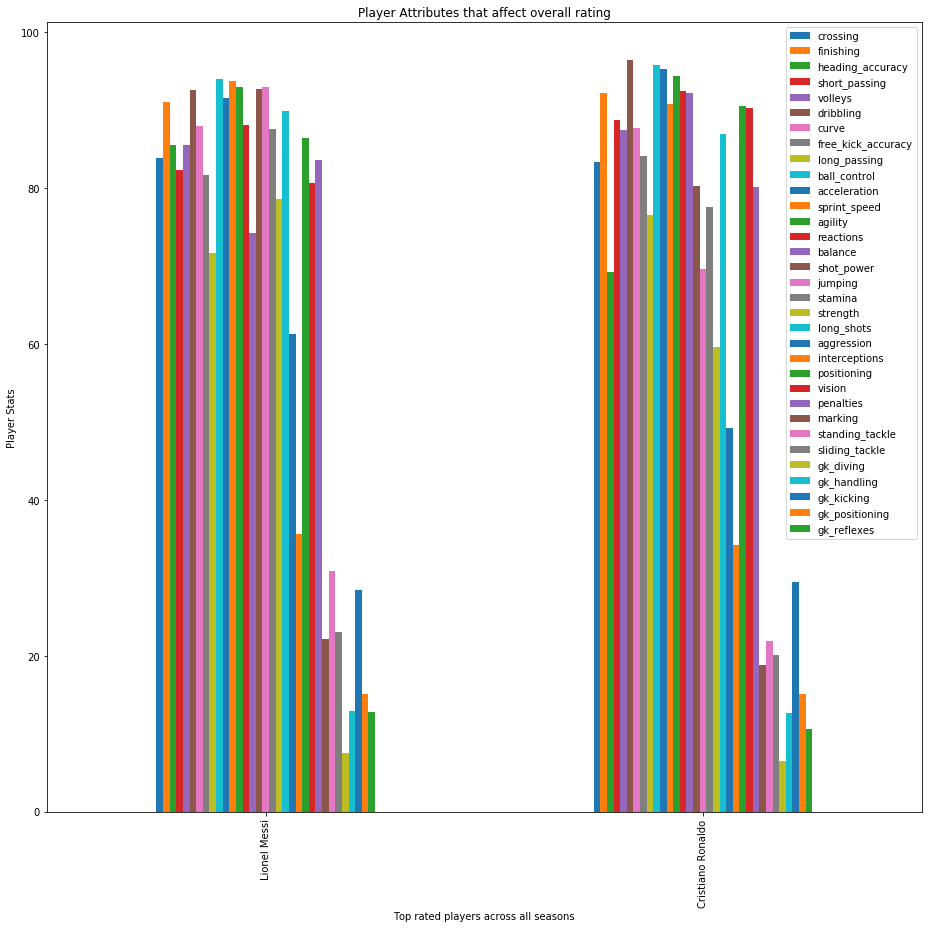

In [40]:
# Plotting the attributes of the top rated players

fig, ax = plt.subplots(figsize=(13, 13))

# create a new bar char
ax = rating_stats.plot.bar(ax=ax);

ax.set_xticklabels(leader_names, rotation=90)

# Set the y axis label
ax.set_ylabel('Player Stats')

# Set the chart's title
ax.set_title('Player Attributes that affect overall rating')

# Set the y axis label 
plt.xlabel("Top rated players across all seasons")

plt.tight_layout();

1. It is hard to determine the factor which best affects the rating but its possible that factors pertaining to gk_ are not that impactful

 * To check the validity of this statement, displayed below is the same plot for a player with least rating

In [41]:
# Obtaining the players who have the least overall rating and storing them in the bottom_names array

bottom_leader= df_pa.groupby(["player_api_id","player_name"])["overall_rating"].mean().sort_values(ascending=True)
bottom_name=[]
bottom_name.append(bottom_leader[0:1].index[0][1])

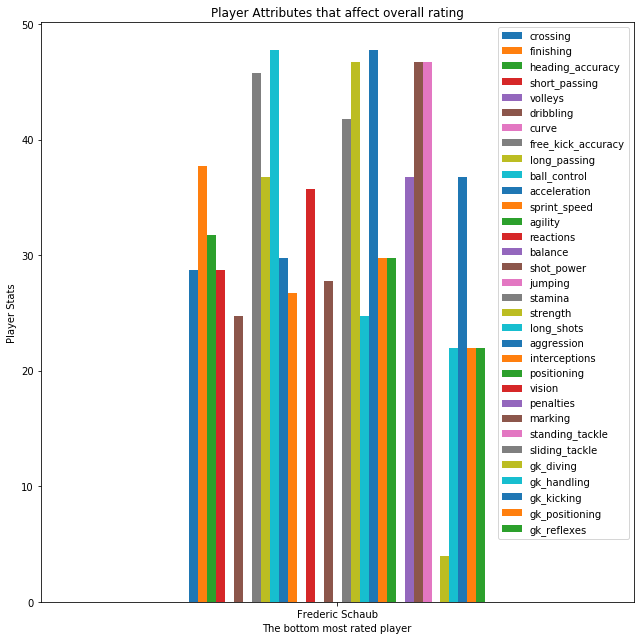

In [42]:
# Slicing the columns associated with player attributes and then querying attributes of the bottom rated player

temp2=df_pa.groupby(["player_api_id","player_name"])[attributes].mean()
rating_stats = temp.query('player_name in @bottom_name')[attributes]

# Plotting the attributes of the top rated players

fig, ax = plt.subplots(figsize=(9, 9))

# create a new bar char
ax = rating_stats.plot.bar(ax=ax);

ax.set_xticklabels(bottom_name, rotation=0)

# Set the y axis label
ax.set_ylabel('Player Stats')

# Set the chart's title
ax.set_title('Player Attributes that affect overall rating')

# Set the y axis label 
plt.xlabel("The bottom most rated player")

plt.tight_layout();

Even for the least rated player, stats from gk_diving to gk_reflexes are similar to that of the top rated players, hence implying that they do not affect the player rating or affect it in a manner too small to be reflected

### Question 3 : Which team out of all leagues has the highest goal difference across all leagues in different seasons? 



* The answer to this question lies in the analysis of df_match dataset

In [43]:
df_match.head(2)

,id,season,date,home_team_goal,away_team_goal,year,country_name,league_name,home_team_name,away_team_name,winner,goal_difference_of_winning_team
0,1,2008/2009,2008-08-17,1,1,2008,Belgium,Belgium Jupiler League,KRC Genk,Beerschot AC,Draw,0
1,29,2008/2009,2008-11-15,1,1,2008,Belgium,Belgium Jupiler League,KRC Genk,KSV Roeselare,Draw,0


In [44]:
# To get the total goal difference:
# the goal difference of teams when they won is subtracted from the goal difference of the matches they lost

positive_gd=df_match.groupby(["season","league_name","home_team_name"],as_index=True)['goal_difference_of_winning_team'].sum()
negative_gd=df_match.groupby(["season","league_name","away_team_name"],as_index=True)['goal_difference_of_winning_team'].sum()
highest_gd=positive_gd-negative_gd

In [45]:
# To analyse season-wise teams with highest goal difference, a for loop is run utilizing the idxmax() attribute 
# of pandas and the loop prints the league, team name and their goal difference for the season


highest_gd_values=[]
highest_gd_teams=[]
leagues=[]
df_match["season"].unique()
range_season=['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013','2014/2015', '2015/2016', '2013/2014','2015/2016']

for i in range_season:
    print(highest_gd[i].idxmax(),",Goal Difference:",highest_gd[i].max(),",Season:",i)
    highest_gd_teams.append(highest_gd[i].idxmax()[1])
    highest_gd_values.append(highest_gd[i].max())
    leagues.append(highest_gd[i].idxmax()[0])

('Spain LIGA BBVA', 'FC Barcelona') ,Goal Difference: 22 ,Season: 2008/2009
('England Premier League', 'Chelsea') ,Goal Difference: 29 ,Season: 2009/2010
('England Premier League', 'Manchester United') ,Goal Difference: 23 ,Season: 2010/2011
('Spain LIGA BBVA', 'FC Barcelona') ,Goal Difference: 37 ,Season: 2011/2012
('Spain LIGA BBVA', 'Real Madrid CF') ,Goal Difference: 21 ,Season: 2012/2013
('France Ligue 1', 'Paris Saint-Germain') ,Goal Difference: 21 ,Season: 2014/2015
('Spain LIGA BBVA', 'Real Madrid CF') ,Goal Difference: 38 ,Season: 2015/2016
('England Premier League', 'Manchester City') ,Goal Difference: 27 ,Season: 2013/2014
('Spain LIGA BBVA', 'Real Madrid CF') ,Goal Difference: 38 ,Season: 2015/2016


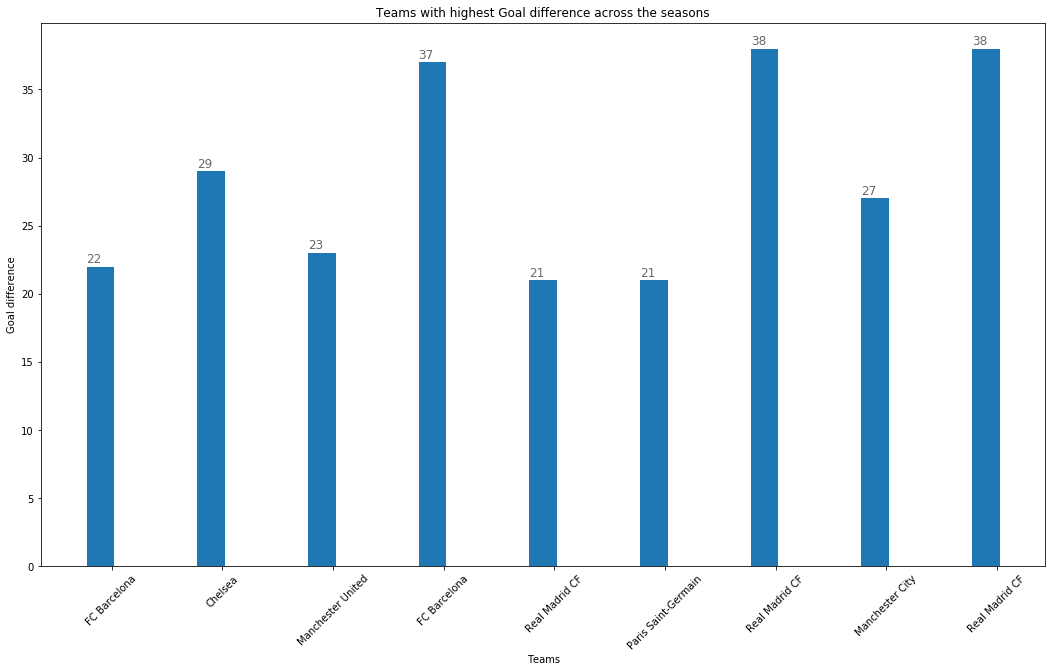

In [46]:
# Setting the positions and width for the bars
width = 0.25
positions = [1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(figsize=(18,10))

# one for total home goals per season
ax.bar(positions, highest_gd_values, width)



# Set the y axis label
ax.set_ylabel('Goal difference')

# Set the chart's title
ax.set_title('Teams with highest Goal difference across the seasons')

# Set the y axis label 
plt.xlabel('Teams')


# Set the position of the x ticks
ax.set_xticks([(p + 0.1) for p in positions])

# Set the position of the x ticks labels
ax.set_xticklabels(highest_gd_teams, rotation=45)

# set text to each bar
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.3, str(i.get_height()), fontsize=12, color='dimgrey')



**A plot for the season-wise leaders of goal difference**
***

### Question 4: Were these teams the respective leaders of their leagues in that season?

* Determining the league winner is not very tedious. Basically the _function league_winner()_ takes in the season and the league as string parameters and returns the winner of that respective league for that respective season

In [47]:
def league_winner(season,league):
    season1 = df_match.query('league_name == @league and season == @season')[['home_team_goal', 'away_team_goal', 'home_team_name', 'away_team_name', 'winner']]
    teams= [season1['winner'].value_counts()[1:2].index.format()[0] ,season1['winner'].value_counts()[2:3].index.format()[0]]
    
    team1_draws= (season1.query("winner == 'Draw' and (home_team_name in @teams or away_team_name in @teams)").home_team_name.str.count(teams[0]).sum()
    + season1.query("winner == 'Draw' and (home_team_name in @teams or away_team_name in @teams)").away_team_name.str.count(teams[0]).sum())
    team1_toal_points= (season1['winner'].value_counts()[:3][1] * 3) + team1_draws
    
    
    team2_draws= (season1.query("winner == 'Draw' and (home_team_name in @teams or away_team_name in @teams)").home_team_name.str.count(teams[1]).sum()
    + season1.query("winner == 'Draw' and (home_team_name in @teams or away_team_name in @teams)").away_team_name.str.count(teams[1]).sum())
    team2_toal_points= (season1['winner'].value_counts()[:3][2] * 3) + team2_draws
    
    
    if (team1_toal_points> team2_toal_points):
        return print("The winner of",season,"season of",league,"was",teams[0])
    else:
        return print("The winner of",season,"season of",league,"was",teams[1])


In [48]:
# Checking the leagues correspong to the teams with highest goal difference
league_winner("2008/2009","Spain LIGA BBVA")
league_winner("2009/2010","England Premier League")
league_winner("2010/2011","England Premier League")
league_winner("2011/2012","Spain LIGA BBVA")
league_winner("2012/2013","France Ligue 1")
league_winner("2013/2014","Spain LIGA BBVA")
league_winner("2014/2015","England Premier League")
league_winner("2015/2016","Spain LIGA BBVA")

The winner of 2008/2009 season of Spain LIGA BBVA was FC Barcelona
The winner of 2009/2010 season of England Premier League was Chelsea
The winner of 2010/2011 season of England Premier League was Manchester United
The winner of 2011/2012 season of Spain LIGA BBVA was Real Madrid CF
The winner of 2012/2013 season of France Ligue 1 was Paris Saint-Germain
The winner of 2013/2014 season of Spain LIGA BBVA was Atlético Madrid
The winner of 2014/2015 season of England Premier League was Chelsea
The winner of 2015/2016 season of Spain LIGA BBVA was FC Barcelona


**This result shows that the teams with the highest goal difference in a league are not always the winners of that league**

Also, this fuction, league_winner can be used to determine the winner of any league present in the dataset for the respectve season. For example:

#### Who was the winner of Italy Serie A in 2011/12 season?

In [49]:
league_winner("2011/2012","Italy Serie A")

The winner of 2011/2012 season of Italy Serie A was Juventus


<a id='conclusions'></a>
## Conclusions

Limitations:
>1. The teams and players data are independent and there is no way to correspond the Player to his Team
>2. The data lacks a proper documentation which lead me to speculate the functioning of a few variables which I ended >up dropping 
>3. A proper interval of player rating and player potential would be beneficial as the data collection is not regularly spaced


#### The questions that have been answered are:

>#### Question 1: Which players have improved throughout the years?
Lamine Kone was the most improved player throughout the 8 years followed by Marco Reus

>#### Question 2: What player attributes affect the overall rating?
Nothing could be interpreted about the causation but the conclusion was that all the attributes having the gk_ factor 
were not afftecting the overall rating much

>#### Question 3: Which teams out of all leagues have the highest goal difference across all leagues in different seasons?
The teams mainly spanned over 3 leagues, EPL (England Premiere League), La Liga (Spain LIGA BBVA) and  France Ligue 1

>#### Question 4: Were these teams the respective leaders of their leagues in that season?
No, implying that the teams with the highest GD are not always winners

Repositories and websites referred:

* https://github.com/Hajeong-Noh/20180419_DataSet-Investigation/blob/master/investigate-a-dataset-template.ipynb

* https://github.com/ozlerhakan/soccer/blob/master/investigate-a-dataset-template-main.ipynb

* https://pandas.pydata.org/pandas-docs/stable/index.html

* https://onefootball.com/

* https://realpython.com/python-strings/

* https://www.programiz.com/python-programming/methods/list/index

* https://www.dummies.com/education/math/statistics/understanding-the-statistical-mean-and-the-median/